In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv('titanic.csv', sep='\t', engine='python')

In [4]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


<AxesSubplot:>

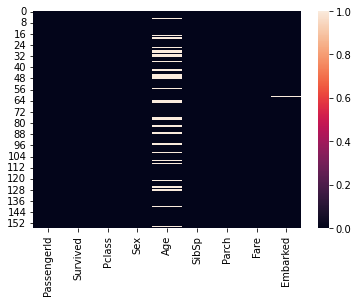

In [5]:
df.info()
sb.heatmap(df.isnull())

In [6]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
151,152,1,1,female,22.0,1,0,66.6000,S
152,153,0,3,male,55.5,0,0,8.0500,S
153,154,0,3,male,40.5,0,2,14.5000,S
154,155,0,3,male,NaN,0,0,7.3125,S


In [7]:
df['Age'] = df['Age'].interpolate()


In [8]:
df = df.dropna()

In [9]:
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [10]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [11]:
df = df.drop(['Sex','Embarked'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Age          155 non-null    float64
 4   SibSp        155 non-null    int64  
 5   Parch        155 non-null    int64  
 6   Fare         155 non-null    float64
 7   C            155 non-null    uint8  
 8   Q            155 non-null    uint8  
 9   S            155 non-null    uint8  
 10  female       155 non-null    uint8  
 11  male         155 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 10.4 KB


In [13]:
 df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [14]:
X = df.values
y = df['Survived'].values
X = np.delete(X,1,axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915

In [17]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7659574468085106